In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Hugging Face 라이브러리 설치

In [2]:
!pip install transformers

In [3]:
import pandas as pd
import csv
import random
import os
import pdb
import json
import glob
from collections import defaultdict
from tqdm import tqdm

# Style Transfer dataset Down
GitHub : https://github.com/smilegate-ai/korean_smile_style_dataset

이 외 참조할만한 데이터 셋
- https://corpus.korean.go.kr/
- https://aihub.or.kr/aihub-data/natural-language/about

In [5]:
if not os.path.exists('korean_smile_style_dataset'):
    !git clone https://github.com/smilegate-ai/korean_smile_style_dataset

Cloning into 'korean_smile_style_dataset'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 81 (delta 21), reused 1 (delta 0), pack-reused 0
Receiving objects: 100% (81/81), 2.57 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [6]:
df = pd.read_csv('./korean_smile_style_dataset/smilestyle_dataset.tsv', sep = '\t')
df.to_csv('./korean_smile_style_dataset/smile.csv',index=False)

In [13]:
# 대화셋이 끝난 다음 행은 NaN값으로 대화 구분
df.head(20)

,formal,informal,android,azae,chat,choding,emoticon,enfp,gentle,halbae,halmae,joongding,king,naruto,seonbi,sosim,translator
0,안녕하세요. 저는 고양이 6마리 키워요.,안녕! 나는 고양이 6마리 키워.,휴먼. 반갑다. 안드로이드는. 고양이. 6마리. 소유중.,아이고 안녕하십니까~ 나는 그냥 고양이 6마리 키우고 있는 사람이여,하잉ㅋㅋ 나 떼걸룩 6마리 키운다!,ㅎㅇ 나 주인님 6마리 모심 ㅋㅋ,안녕!! >< 나는 고양이😺를 ➏ 마리 키우고있어!! 0_0,안녕안녕~! 나 고양이 6마리나 키운다? 완전 대박이징~,"안녕하십니까,, 저는 고양이 6마리 키웁니다.",안녕하신가~... 난 지금 고양이를 6마리 키우고 있다네,하유 시벌것 괭이놈 6마리 키우는데 힘들어 죽겟네,안녕하냐 ㅡㅡ 나 씹냥이 6마리나 키운다 하;,반갑소. 짐은 고양이를 6마리나 키우오.,안녕하냐니깐! 난 고양이를 6마리 키우고있다니깐!,안녕하시오! 소인은 고양이를 6마리 키우고 있소!,안녕… 난 고양이 6마리 키워 ㅠㅠ,반가운. 나는 6마리의 고양이를 소지하고 있다.
1,고양이를 6마리나요? 키우는거 안 힘드세요?,고양이를 6마리나? 키우는거 안 힘들어?,고양이. 6마리. 양육. 번거로운가.,아니 무슨 고양이를 6마리나? 거 키우는 거 안 힘든가?,엥? 6마리나? 안힘듬?ㅋㅋㅋㅋ,6마리? 에바아니냐 안 힘듦?,고양이를 6마리나?!! w(ﾟДﾟ)w 키우는거 안 힘듬?? (⊙_⊙;),고양이를 6마리나? 완전 대박~ 키우는 거 안 힘들어?!,"고양이를 6마리나 키우십니까? 안 힘드신지,,",고양이를 6마리나? 키우는거 힘들지 않는가?,니기럴 털만 날리는 거 키우기 안 힘들데?,아니 고양이를 6마리나? 안힘드냐?,고양이를 6마리나? 키우는게 수고스럽진 않소?,고양이를 6마리나? 키우는거 힘들지 않냐니깐?,고양이를 6마리나 키우고 있는 것이오? 힘들지 않소?,고양이..6마리나? ㅠ 키우는건 혹시 안힘들어..?,6마리의 고양이? 당신은 그들로부터 지치지 않습니까?
2,제가 워낙 고양이를 좋아해서 크게 힘들진 않아요.,내가 워낙 고양이를 좋아해서 크게 힘들진 않아.,안드로이드. 고양이. 선호. 힘들지. 않음.,내가 또 워~낙에 고양이를 좋아해서 크게 뭐 힘들진 않고,내가 고양이 좋아해서 딱히 안힘듬 ㅋㅋㅋ,ㄱㅊ 나 고양이 환장해서 힘든 것도 모름,뭐 나야 워낙에 고양이 좋아하니까 딱히 안힘드엉! \(@^0^@)/,내가 또 워~낙에 고양이를 좋아하잖아~ 그렇게 크~게 힘들진 않아 ㅎㅎ~,제가 워낙 고양이를 좋아해서 크게 힘들진 않습니다.,내가 워낙에...고양이가 좋아가지고 그렇게 힘들지 않어...^^,옘병 내가 좋아하니까 키워야지 시벌것,고양이 좋아한다고ㅡㅡ 1도 안힘듬 ㅡㅡ,과인은 고양이를 어여삐 어겨 그리 수고스럽진 않소,내가 고양이를 엄청 좋아해서 별로 힘들지 않다니깐!,소인 고양이를 엄청 좋아하기 때문에 별로 힘들지 않소이다.,내가 고양이 워낙 좋아해서..ㅠㅠ 크게 힘들진 않은 것 같아..,나는 고양이의 큰 애호가. 지치지 않는다.
3,가장 나이가 많은 고양이가 어떻게 돼요?,가장 나이가 많은 고양이가 몇 살이야?,제일. 나이많은. 고양이. 나이. 무엇.,그려 가장 나이가 많은 고양이가 몇살이여?,가장 나이 먹은 고양이가 몇살이야?,젤 낡은 고영희가 몇 살임?,가장 나이 먹은 고양인 몇 살이양? (´･ω･`)?,대박대박 완전 대박!! 그럼 제~일 나이 많은 고양이는 몇살이야~?!,가장 나이가 있는 고양이가 몇살입니까?,고양이들 중에서…가장 나이 먹을 애가 몇살인가?...,거 젤 빨리 뒤질 놈이 나이 얼마나 쳐먹었냐,가장 늙은애가 몇살인데,최고령 고양이의 나이는 어떻게 되는가?,가장 나이 많이 먹은 고양이가 몇 살 이냐니깐?!,나이를 가장 많이 먹은 고양이가 몇 살이오?,혹시.. 제일 나이 많은 고양이는.. 몇살이야..?ㅠ,가장 늙은 고양이가 몇 년입니까?
4,여섯 살입니다. 갈색 고양이에요.,여섯 살이야. 갈색 고양이지.,고양이. 갈색. 여섯살.,6살인데 갈색 고양이 있어~,이제 여섯살이고 갈색고양이임!,"6살, 갈색임",여설 살!! ㄱ^o^/ 색깔은 갈색! O(*￣▽￣*)ブ,"6살인 애 있는데, 완전 귀.여.워. 갈색 고양이야 진짜 대박이지?",6살된 갈색 아이가 있습니다.,저…갈색 고양이인데…여섯살이지~..,저 노망난 갈색놈이 6살 뒤룩뒤룩 쳐먹은 놈이여,여섯살 갈색냥인데 왜,여섯 살이오. 갈색 고양이오.,갈색 고양이가 여섯살이라니깐!,여섯 살에 갈색 고양이오,여섯살이야.. 갈색 ㅠㅠ 고양이야..ㅠ,여섯. 고양이는 갈색이다.
5,그럼 가장 어린 고양이가 어떻게 돼요?,그럼 가장 어린 고양이는?,제일. 나이어린. 고양이. 나이. 무엇.,그럼 그 가장 어린 고양이는?,그럼 가장 애기인 고양이는 몇살이야?,그럼 가장 아깽이는?,그럼 가장 애기인 고양이는?? (⊙_⊙)？,대박! 완전 귀엽겠다~!! 그럼 제~일 나이 적은 애는?! 몇살이야??,그럼 가장 어린 고양이는 나이가 어떻게 됩니까?,그럼 제일 어린 고양이는 몇살인겐가?...,새파랗게 어린놈은 얼마나 쳐먹었는데?,제일 어린애는 몇살?,허면 가장 어린 고양이는 어떻게 되는가?,그럼 가장 나이 어린 고양이는 몇살이냐니깐?,그럼 가장 어린 고양이는 몇 살인 것이오?,혹시.. 제일 나이 어린 고양이는..ㅠㅠ 몇살이야..?,가장 젊은 고양이는 어떤?
6,한 살입니다. 작년에 분양 받았어요.,한 살이야. 작년에 분양 받았어.,한살. 분양시기는. 작년.,그 작년에 분양 받은 1살 있지~,작년에 분양 받았는데 1살이야!,1살 ㅋㅋ 작년에 분양 받음,한살~! (ﾉ*ФωФ)ﾉ 작년 분양 받았지롱~^0^,1살 완전 대박이지~!! 작년에 분양 받았어 진짜 너무 귀여워~!,1살 짜리 아이도 있습니다. 작년에 분양 받았지요.,한 살이지~….작년에…분양 받았어~…,1살 먹은 염병할 놈 저거 작년에 분양 받았어,1살이고 작년에 데려옴,한살이오. 작년에 분양을 받게 되었소.,한 살이고. 작년에 분양 받았다니깐!,한 살인데 작년에 분양 받았소.,한살이야 ㅠ 작년에 분양 받았어..,일년. 작년에 적용했다.
7,그럼 고양이들끼리 안 싸우나요?,고양이들끼리 안 싸워?,고양이. 끼리. 다툼. 없는가.,그럼 그거 고양이끼린 안 싸우나?,냥이들끼리 안 싸움?,고앵이들끼리 안 싸움?,고양인끼린 안싸웡? ＼（〇_ｏ）／,"하유~ 귀요미들~ 혹시 그럼,, 고양이들끼린 안 싸워?!",고양이들끼리 다투진 않나요?,고양이들은 서로…싸우거나…그러지 않나?..,그 염병할 자식들끼린 안 싸운다냐?,고양이들 맨날 싸우겠네 ㅋ,허면 고양이들끼리 다툼이 있지는 않은가?,고양이들끼리 싸우지 않냐니깐!,고양이들끼리 싸우거나 그러지는 않소?,혹시.. 고양이들끼리 싸우지는..않아? ㅠ,고양이들은 서로 결투?
8,저희 일곱은 다같이 한 가족입니다. 싸우는 일은 없어요.,우리일곱은 다같이 한 가족이야. 싸우는 일은 없어.,우리일곱. 다같이 한가족. 싸우는일. 없음.,아잇 우리 일곱명은 다같이 한 가족이지 가족! 싸우는 일은 읎어~,우리 일곱은 다 한 가족이라서 싸울 일이 없어,응~ 절대 안 싸워 7-1=0 진리지,우리 일곱은 다같이 한 가족이야~:D. 싸우는 일 따윈 업쉉~o((>ω< ))o,당연 당연!! 우리 일곱은 다같이 한 가족인걸?!,"저희 일곱은 다같이 한 가족이라,, 싸우는 일은 없네요 ㅎㅎ",우리 일곱은 다~같이…가족이라서..싸우는 일이 없네 그려…허허…,"이런 개나리 쌍화차에 끓여먹을,, 우린 가 족같은 사이여가지고 싸우면 내 손에 다 ...",우리 다같이 한식군데 싸우긴 뭘 싸움 ㅡㅡ,우리 일곱은 다같이 한 가족과 같소. 싸우는 일은 없소.,우리 일곱은 다 한 간족이라 싸우는 일이 없다니깐!,우리 일곱은 다같이 한 가족이라. 싸우는 일이 없는 것이오!,우리 일곱은 다같이 한가족이라..ㅠㅠ 싸우는 일은 없는 것 같아 ㅠ,우리 가족은 칠. 낮은 다툼의 빈도.
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(3705, 17)

## 대화셋을 세션으로 분할

In [11]:
data_path = './korean_smile_style_dataset/smile.csv'

f = open(data_path, 'r')
rdr = csv.reader(f)

for line in rdr:
    print(line)
    break

['formal', 'informal', 'android', 'azae', 'chat', 'choding', 'emoticon', 'enfp', 'gentle', 'halbae', 'halmae', 'joongding', 'king', 'naruto', 'seonbi', 'sosim', 'translator']


In [14]:
session_dataset = []
session = []

for i, line in enumerate(rdr):
    if i == 0:
        header = line
    else:
        utt = line[0]
        if utt.strip() != '':
            session.append(utt)
        else:
            session_dataset.append(session)
            session = []
session_dataset.append(session)
f.close()

In [15]:
session_dataset[0]

['고양이를 6마리나요? 키우는거 안 힘드세요?',
 '제가 워낙 고양이를 좋아해서 크게 힘들진 않아요.',
 '가장 나이가 많은 고양이가 어떻게 돼요?',
 '여섯 살입니다. 갈색 고양이에요.',
 '그럼 가장 어린 고양이가 어떻게 돼요?',
 '한 살입니다. 작년에 분양 받았어요.',
 '그럼 고양이들끼리 안 싸우나요?',
 '저희 일곱은 다같이 한 가족입니다. 싸우는 일은 없어요.']

In [17]:
session_dataset[-1]

['안녕하세요, 잘 지내고 있으세요?',
 '사실 약간 우울한 것 같아요. 그쪽은 잘 지내고 있으세요?',
 '어째서 우울하세요?',
 '제가 제일 좋아하는 티비쇼가 꽤 오랫동안 안 나올 것 같아서 슬프네요.',
 '게임 오브 쓰론 말씀하세요?',
 '네, 2019년에서야 다시 찍는다고 발표했어요.',
 '그래도 아예 멈춘 것보다는 나은 것 같아요.',
 '네, 이야기를 매듭지 않고 끝냈으면 정말 슬펐을 것 같아요.',
 '그럼 이제는 어떤 쇼를 볼 건가요?',
 '블랙 미러도 재미있다고 들었는데, 어떤가요?',
 '저는 티비를 자주 안 봐서 사실 잘 몰라요.',
 '그러면 직접 알아봐야겠네요.',
 '새로운 티비쇼를 개척하는 것도 재밌을거에요.',
 '저도 기대하고 있습니다.']

In [18]:
len(session_dataset)

236

### 토크나이저

In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('klue/roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [20]:
dir(tokenizer)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_additional_special_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_bos_token',
 '_call_one',
 '_cls_token',
 '_compile_jinja_template',
 '_convert_encoding',
 '_convert_id_to_token',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strategies',
 '_in_target_context_manager',
 '_mask_token',
 '

In [22]:
tokenizer.special_tokens_map_extended

{'bos_token': '[CLS]',
 'eos_token': '[SEP]',
 'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [26]:
# eos_token과 sep_token 같다 -> sep_token을 <SEP> 변경하여 사용하도록

tokenizer.eos_token, tokenizer.sep_token, tokenizer.eos_token_id, tokenizer.sep_token_id

('[SEP]', '[SEP]', 2, 2)

In [27]:
special_tokens = {'sep_token':'<SEP>'}
tokenizer.add_special_tokens(special_tokens)

tokenizer.eos_token, tokenizer.sep_token, tokenizer.eos_token_id, tokenizer.sep_token_id

('[SEP]', '<SEP>', 2, 32000)

## MLM
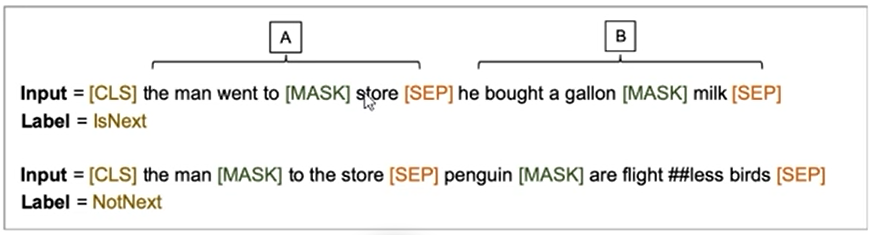

- mask_token을 통해 [MASK]된 부분의 단어를 예측함으로써 모델이 텍스트를 이해하기 용이하도록 한다.
- 전체 텍스트에서 15%의 단어를 선택 후, 80%는 [MASK], 10% 현재 단어, 10% 임의의 단어로 대체한다.

In [32]:
tokenizer.mask_token, tokenizer.mask_token_id

('[MASK]', 4)

In [40]:
session_dataset[0], len(session_dataset[0])

(['고양이를 6마리나요? 키우는거 안 힘드세요?',
  '제가 워낙 고양이를 좋아해서 크게 힘들진 않아요.',
  '가장 나이가 많은 고양이가 어떻게 돼요?',
  '여섯 살입니다. 갈색 고양이에요.',
  '그럼 가장 어린 고양이가 어떻게 돼요?',
  '한 살입니다. 작년에 분양 받았어요.',
  '그럼 고양이들끼리 안 싸우나요?',
  '저희 일곱은 다같이 한 가족입니다. 싸우는 일은 없어요.'],
 8)

In [43]:
tokenizer.encode(session_dataset[0][0], add_special_tokens=False), tokenizer.encode(session_dataset[0][0], add_special_tokens=True)

([7003,
  2138,
  26,
  12736,
  2075,
  2182,
  35,
  5688,
  2259,
  2180,
  1378,
  18941,
  5971,
  35],
 [0,
  7003,
  2138,
  26,
  12736,
  2075,
  2182,
  35,
  5688,
  2259,
  2180,
  1378,
  18941,
  5971,
  35,
  2])

In [36]:
def get_mask(session):
    mask_ratio = 0.15
    corrupt_tokens = []
    output_tokens = []

    for i, utt in enumerate(session):
        original_token = tokenizer.encode(utt, add_special_tokens=False)

        mask_num = int(len(original_token) * mask_ratio)
        mask_positions = random.sample([x for x in range(len(original_token))], mask_num)
        corrupt_token = []
        for pos in range(len(original_token)):
            if pos in mask_positions:
                corrupt_token.append(tokenizer.mask_token_id)
            else:
                corrupt_token.append(original_token[pos])

        if i == len(session)-1:
            output_tokens += original_token
            corrupt_tokens += corrupt_token
        else:
            output_tokens += original_token + [tokenizer.sep_token_id]
            corrupt_tokens += corrupt_token + [tokenizer.sep_token_id]

    return output_tokens, corrupt_tokens

In [37]:
output_tokens, corrupt_tokens = get_mask(session_dataset[0])
print(output_tokens)
print(corrupt_tokens)

[7003, 2138, 26, 12736, 2075, 2182, 35, 5688, 2259, 2180, 1378, 18941, 5971, 35, 32000, 1545, 2116, 7020, 7003, 2138, 30581, 1750, 2318, 4390, 2043, 1380, 2227, 2182, 18, 32000, 3676, 4358, 2116, 1039, 2073, 7003, 2116, 3842, 6961, 35, 32000, 7070, 1236, 12190, 18, 14008, 7003, 2170, 2182, 18, 32000, 4292, 3676, 4030, 7003, 2116, 3842, 6961, 35, 32000, 1891, 1236, 12190, 18, 4842, 2170, 4516, 1122, 2886, 10283, 18, 32000, 4292, 7003, 2031, 12804, 1378, 6817, 2075, 2182, 35, 32000, 4940, 7843, 2073, 809, 10597, 1891, 3937, 12190, 18, 6817, 2259, 1507, 2073, 1415, 10283, 18]
[7003, 2138, 26, 12736, 2075, 2182, 35, 5688, 4, 2180, 4, 18941, 5971, 35, 32000, 1545, 2116, 7020, 7003, 4, 30581, 1750, 2318, 4, 2043, 1380, 2227, 2182, 18, 32000, 3676, 4358, 2116, 1039, 2073, 7003, 2116, 3842, 4, 35, 32000, 7070, 1236, 12190, 18, 14008, 7003, 4, 2182, 18, 32000, 4292, 3676, 4030, 7003, 2116, 3842, 4, 35, 32000, 1891, 4, 12190, 18, 4842, 2170, 4516, 1122, 2886, 10283, 18, 32000, 4292, 7003, 2031, 

In [38]:
print(tokenizer.decode(output_tokens))
print(tokenizer.decode(corrupt_tokens))

고양이를 6마리나요? 키우는거 안 힘드세요? <SEP> 제가 워낙 고양이를 좋아해서 크게 힘들진 않아요. <SEP> 가장 나이가 많은 고양이가 어떻게 돼요? <SEP> 여섯 살입니다. 갈색 고양이에요. <SEP> 그럼 가장 어린 고양이가 어떻게 돼요? <SEP> 한 살입니다. 작년에 분양 받았어요. <SEP> 그럼 고양이들끼리 안 싸우나요? <SEP> 저희 일곱은 다같이 한 가족입니다. 싸우는 일은 없어요.
고양이를 6마리나요? 키우 [MASK]거 [MASK] 힘드세요? <SEP> 제가 워낙 고양이 [MASK] 좋아해서 크게 [MASK]진 않아요. <SEP> 가장 나이가 많은 고양이가 어떻게 [MASK]? <SEP> 여섯 살입니다. 갈색 고양이 [MASK]요. <SEP> 그럼 가장 어린 고양이가 어떻게 [MASK]? <SEP> 한 [MASK]입니다. 작년에 분양 받았어요. <SEP> 그럼 고양이들끼리 안 [MASK]나요? <SEP> 저희 일곱은 다같이 한 가족입니다. 싸우는 일 [MASK] 없 [MASK].


## URC - Utterance Relevance Classification

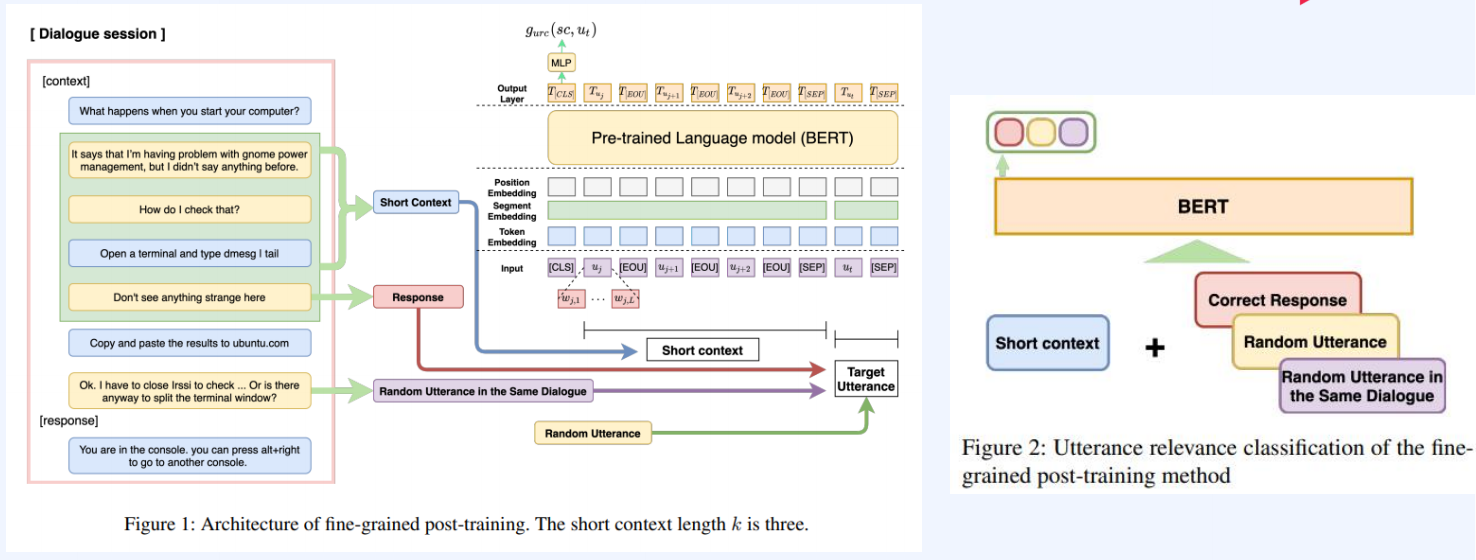

- 전체 text에서 short 'context - response' pairs로 나누어 학습할 수 있게 한다. 그래서 URC로 발화 간의 관계를 학습할 수 있다.
- 논문에서는 3개의 class -> 다양한 구성으로 할 수도.

- 데이터 증강 효과

In [45]:
# dataset 236 -> 2289
k = 4 #(context=3, response=1)
short_session_dataset = []
for session in session_dataset:
    for i in range(len(session)-k-1):
        short_session_dataset.append(session[i:i+k])

len(session_dataset), len(short_session_dataset)

(236, 2289)

In [46]:
short_session_dataset[-1]

['그럼 이제는 어떤 쇼를 볼 건가요?',
 '블랙 미러도 재미있다고 들었는데, 어떤가요?',
 '저는 티비를 자주 안 봐서 사실 잘 몰라요.',
 '그러면 직접 알아봐야겠네요.']

In [47]:
short_session_dataset[0]

['고양이를 6마리나요? 키우는거 안 힘드세요?',
 '제가 워낙 고양이를 좋아해서 크게 힘들진 않아요.',
 '가장 나이가 많은 고양이가 어떻게 돼요?',
 '여섯 살입니다. 갈색 고양이에요.']

### URC 생성

In [49]:
all_utts = set()
for session in session_dataset:
    for utt in session:
        all_utts.add(utt)

all_utts = list(all_utts)

print(f'all_utts 길이: ', len(all_utts))
print(all_utts[0])

all_utts 길이:  3429
다 먹은 줄 알았는데, 이빨을 닦고 나서는 먹을 수 없잖아요. 한시간 뒤에 먹을 아이스크림을 미리 먹는 것입니다.


In [54]:
def get_urc(session):
    urc_tokens = []
    context_utts = []

    for i in range(len(session)):
        utt = session[i]
        original_token = tokenizer.encode(utt, add_special_tokens=False)

        if i == len(session)-1:
            # positive(기존) response
            positive_tokens = urc_tokens + original_token

            # random negative response
            while True:
                random_neg_response = random.choice(all_utts)
                if random_neg_response not in context_utts:
                    break
            random_neg_response_token = tokenizer.encode(random_neg_response, add_special_tokens=False)
            random_tokens = urc_tokens + random_neg_response_token

            # context negative response
            context_neg_response = random.choice(context_utts)
            context_neg_response_token = tokenizer.encode(context_neg_response, add_special_tokens=False)
            context_neg_tokens = urc_tokens + context_neg_response_token
        else:
            urc_tokens += original_token + [tokenizer.sep_token_id]

        context_utts.append(utt)

    return positive_tokens, random_tokens, context_neg_tokens, [0, 1, 2]

In [55]:
positive_tokens, random_tokens, context_neg_tokens, urc_labels = get_urc(short_session_dataset[0])

print('positive : ', tokenizer.decode(positive_tokens))
print('random : ', tokenizer.decode(random_tokens))
print('context : ', tokenizer.decode(context_neg_tokens))

positive :  고양이를 6마리나요? 키우는거 안 힘드세요? <SEP> 제가 워낙 고양이를 좋아해서 크게 힘들진 않아요. <SEP> 가장 나이가 많은 고양이가 어떻게 돼요? <SEP> 여섯 살입니다. 갈색 고양이에요.
random :  고양이를 6마리나요? 키우는거 안 힘드세요? <SEP> 제가 워낙 고양이를 좋아해서 크게 힘들진 않아요. <SEP> 가장 나이가 많은 고양이가 어떻게 돼요? <SEP> 그녀는 제 담당 물리 치료사의 조수였습니다.
context :  고양이를 6마리나요? 키우는거 안 힘드세요? <SEP> 제가 워낙 고양이를 좋아해서 크게 힘들진 않아요. <SEP> 가장 나이가 많은 고양이가 어떻게 돼요? <SEP> 고양이를 6마리나요? 키우는거 안 힘드세요?


## Build Post-training Dataset

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, RobertaForMaskedLM, RobertaModel, get_linear_schedule_with_warmup